In [1]:
import time
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import warnings
import pyecharts.options as opts
from pyecharts.commons.utils import JsCode
from pyecharts.charts import Line
from pyecharts.charts import Calendar
from pyecharts.charts import Map
from pyecharts.globals import CurrentConfig, OnlineHostType
CurrentConfig.ONLINE_HOST = "https://assets.pyecharts.org/assets/"

# 显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

warnings.filterwarnings("ignore")

# 新冠疫情分析

新型冠状病毒肺炎（COVID-19，简称“新冠肺炎”）疫情肆虐全球多个国家，2020年3月11日，世界卫生组织 (WHO) 正式宣布将新冠肺炎列为全球性大流行病。

在全球抗击新型冠状病毒疫情的过程中，产生了前所未有的大规模疫情数据，利用大数据分析技术能够协助发现病毒传染源、监测疫情发展、调配救援物资，从而更好地进行疫情防控工作。

本项目利用公开的疫情数据集对疫情的发展趋势进行分析和预测。本项目所用的数据集为：
* china_provincedata.csv: 
    * 包含各省新冠疫情的统计数据
    * 时间：从2020年01月19日前后到2020年6月17日前后
    
* countrydata.csv:
    * 包含各国新冠疫情的统计数据
    * 时间：从2020年01月20日到2020年6月17日


## 1 新冠疫情统计分析



### 1.1 新冠疫情折线图

In [2]:
def render_lines(country_name, data_path):
    # 第一步：读取数据
    data = pd.read_csv(data_path)
    data = data[data['countryName'] == country_name]
    date_list = list(data['dateId'])
    date_list = list(map(lambda x: str(x), date_list))
    confirm_list = list(data['confirmedCount'])
    current_list = list(data['currentConfirmedCount'])
    dead_list = list(data['deadCount'])
    heal_list = list(data['curedCount'])

    # 第二步：绘制折线面积图
    line = (
        Line()
        .add_xaxis(date_list)
        .add_yaxis('确诊数据', confirm_list, is_smooth=True,
                   markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_="max"),
                                                           opts.MarkPointItem(type_="min")]))
        .add_yaxis('现存确诊数据', current_list, is_smooth=True,
                   markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_="max"),
                                                           opts.MarkPointItem(type_="min")]))
        .add_yaxis('死亡数据', dead_list, is_smooth=True,
                   markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_="max"),
                                                           opts.MarkPointItem(type_="min")]))
        .add_yaxis('治愈数据', heal_list, is_smooth=True,
                   markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_="max"),
                                                           opts.MarkPointItem(type_="min")]))
        # 隐藏数字 设置面积
        .set_series_opts(
            areastyle_opts=opts.AreaStyleOpts(opacity=0.5),
            label_opts=opts.LabelOpts(is_show=False))

        # 设置x轴标签旋转角度
        .set_global_opts(xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-30)),
                         yaxis_opts=opts.AxisOpts(name='人数', min_=3),
                         title_opts=opts.TitleOpts(title='COVID19'+country_name+'疫情数据曲线图'))
    )

    return line

#### 1.1.1 中国疫情折线图

In [3]:
# 输入参数
country_name = '中国'
data_path = "../../data/covid_19/countrydata.csv"

# 显示折线图
render_lines(country_name, data_path).render_notebook()

* 保存图像到html

In [4]:
# 输入参数
country_name = '中国'
data_path = "../../data/covid_19/countrydata.csv"
file_name = '附件：2020年1月至6月{}新冠疫情折线图.html'.format(country_name)
file_path = './results/{}'.format(file_name)

# 保存到文件
render_lines(country_name, data_path).render(file_path)

'D:\\a1-工作文档\\工作文档\\个人笔记\\notebook\\data_mining\\projects\\武汉疫情分析\\results\\附件：2020年1月至6月中国新冠疫情折线图.html'

#### 1.1.2 国外疫情折线图举例

In [5]:
# 输入国家名
country_name = '美国'
data_path = "../../data/covid_19/countrydata.csv"

# 显示折线图
render_lines(country_name, data_path).render_notebook()

In [6]:
# 输入国家名
country_name = '美国'
data_path = "../../data/covid_19/countrydata.csv"

# 保存折线图
file_name = '附件：2020年1月至6月{}新冠疫情折线图.html'.format(country_name)
file_path = './results/{}'.format(file_name)
render_lines(country_name, data_path).render(file_path)

'D:\\a1-工作文档\\工作文档\\个人笔记\\notebook\\data_mining\\projects\\武汉疫情分析\\results\\附件：2020年1月至6月美国新冠疫情折线图.html'

### 1.2 新冠疫情日历图

In [7]:
def calendar_base(country_name, data_path) -> Calendar:
    # 第一步：读取数据，设置日期
    begin = datetime.date(2020, 1, 19)
    end = datetime.date(2020, 6, 17)
    data = pd.read_csv(data_path)
    data = data[data['countryName'] == country_name]
    date_list = list(data['dateId'])
    date_list = list(map(lambda x: str(x), date_list))
    confirm_list = list(data['confirmedIncr'])
    data = [
        [str(begin + datetime.timedelta(days=i)),
         confirm_list[i]]  # 设置日期间隔，步数范围
        for i in range((end - begin).days - 3)
    ]

    # 第二步：绘制日历图
    c = (
        Calendar()
        .add('', data, calendar_opts=opts.CalendarOpts(range_=['2020-1', '2020-6']))
        .set_global_opts(
            title_opts=opts.TitleOpts(
                title='{}疫情每日新增确诊病例日历图'.format(country_name), subtitle='From Weix'),
            visualmap_opts=opts.VisualMapOpts(
                pieces=[
                    {'min': 13000, 'color': '#7f1818'},
                    {'min': 1000, 'max': 10000},
                    {'min': 500, 'max': 999},
                    {'min': 100, 'max': 499},
                    {'min': 10, 'max': 99},
                    {'min': 0, 'max': 9}],
                orient='vertical',
                pos_top='230px',
                pos_left='100px',
                is_piecewise=True
            )
        )
    )
    return c

#### 1.2.1 中国疫情日历图

In [8]:
# 输入参数
country_name = '中国'
data_path = "../../data/covid_19/countrydata.csv"

# 输出日历图
calendar_base(country_name, data_path).render_notebook()

* 保存图像到html

In [9]:
# 输入参数
country_name = '中国'
data_path = "../../data/covid_19/countrydata.csv"
file_name = '附件：2020年1月至6月{}新冠疫情每日新增确诊病例日历图.html'.format(country_name)
file_path = './results/{}'.format(file_name)

# 输出日历图
calendar_base(country_name, data_path).render(file_path)

'D:\\a1-工作文档\\工作文档\\个人笔记\\notebook\\data_mining\\projects\\武汉疫情分析\\results\\附件：2020年1月至6月中国新冠疫情每日新增确诊病例日历图.html'

#### 1.2.2 国外疫情日历图举例

In [10]:
# 输入国家名即可
country_name = '美国'
data_path = "../../data/covid_19/countrydata.csv"

# 输出日历图
calendar_base(country_name, data_path).render_notebook()

### 1.3 中国疫情分布地图

In [11]:
# 全国疫情分布图（死亡率）
def render_mapcountChina_rate(dateId, data_path):
    data = pd.read_csv(data_path)
    data = data[data['dateId'] == dateId]
    list_data = list(zip(list(data['provinceShortName']), list(
        (data['deadCount']*1000 // data['confirmedCount'])/10)))

    c = (
        Map()
        .add('', list_data, 'china')
        .set_global_opts(
            title_opts=opts.TitleOpts(title='全国疫情分布图（死亡率）'+str(dateId)),
            visualmap_opts=opts.VisualMapOpts(is_show=True,
                                              split_number=6,
                                              is_piecewise=True,  # 是否为分段型
                                              pos_top='center',
                                              pieces=[
                                                  # 不指定 max
                                                  {'min': 40, 'color': '#7f1818'},
                                                  {'min': 20, 'max': 40},
                                                  {'min': 10, 'max': 20},
                                                  {'min': 8, 'max': 10},
                                                  {'min': 4, 'max': 8},
                                                  {'min': 1, 'max': 4},
                                                  {'min': 0.6, 'max': 1},
                                                  {'min': 0.1, 'max': 0.5},
                                                  {'min': 0, 'max': 0}
                                              ]),
        )
    )
    return c

# 全国疫情分布图（累计死亡人数）


def render_mapcountChina_death(dateId, data_path):
    data = pd.read_csv(data_path)
    data = data[data['dateId'] == dateId]
    list_data = list(
        zip(list(data['provinceShortName']), list(data['deadCount'])))

    c = (
        Map()
        .add('', list_data, 'china')
        .set_global_opts(
            title_opts=opts.TitleOpts(title='全国疫情分布图（累计死亡人数）'+str(dateId)),
            visualmap_opts=opts.VisualMapOpts(is_show=True,
                                              split_number=6,
                                              is_piecewise=True,  # 是否为分段型
                                              pos_top='center',
                                              pieces=[
                                                  # 不指定 max
                                                  {'min': 10000, 'color': '#7f1818'},
                                                  {'min': 1000, 'max': 10000},
                                                  {'min': 500, 'max': 999},
                                                  {'min': 100, 'max': 499},
                                                  {'min': 10, 'max': 99},
                                                  {'min': 0, 'max': 9}],
                                              ),
        )
    )
    return c

# 全国疫情分布图（现存）


def render_mapcountChina_current(dateId, data_path):
    data = pd.read_csv(data_path)
    data = data[data['dateId'] == dateId]
    list_data = list(zip(list(data['provinceShortName']),
                         list(data['currentConfirmedCount'])))

    c = (
        Map()
        .add('', list_data, 'china')
        .set_global_opts(
            title_opts=opts.TitleOpts(title='全国疫情分布图（现存）'+str(dateId)),
            visualmap_opts=opts.VisualMapOpts(is_show=True,
                                              split_number=6,
                                              is_piecewise=True,
                                              pos_top='center',
                                              pieces=[
                                                  # 不指定 max
                                                  {'min': 10000, 'color': '#7f1818'},
                                                  {'min': 1000, 'max': 10000},
                                                  {'min': 500, 'max': 999},
                                                  {'min': 100, 'max': 499},
                                                  {'min': 10, 'max': 99},
                                                  {'min': 0, 'max': 9}],
                                              ),
        )
    )
    return c


def render_mapcountChina(dateId, data_path, type_id):
    if(type_id == 0):
        return render_mapcountChina_current(dateId, data_path)
    elif(type_id == 1):
        return render_mapcountChina_death(dateId, data_path)
    elif(type_id == 2):
        return render_mapcountChina_rate(dateId, data_path)

两个变量可以更改：
* dateId: 日期，范围在[20200120, 20200617]之间
* type_id:
    * 0: 全国疫情现存确诊病例的地图
    * 1: 全国疫情累计死亡人数的地图
    * 2: 全国疫情死亡率的地图

#### 1.3.1 全国疫情分布图（现存）

In [12]:
# 输出20200212的全国疫情现存分布图(20200120-20200617)
data_path = "../../data/covid_19/china_provincedata.csv"
dateId = 20200212
type_id = 0

# 显示图像
render_mapcountChina(dateId, data_path, type_id).render_notebook()

#### 1.3.2 全国疫情分布图（累计死亡人数）

In [13]:
# 输出20200601的全国疫情分布图（累计死亡人数）(20200120-20200617)
data_path = "../../data/covid_19/china_provincedata.csv"
dateId = 20200601
type_id = 1

# 显示图像
render_mapcountChina(dateId, data_path, type_id).render_notebook()

#### 1.3.3 全国疫情分布图（死亡率）

In [14]:
# 输出20200212的全国疫情分布图（死亡率）(20200120-20200617)
data_path = "../../data/covid_19/china_provincedata.csv"
dateId = 20200212
type_id = 2

# 显示图像
render_mapcountChina(dateId, data_path, type_id).render_notebook()

* 保存文件到html

In [15]:
# 输出某一天的中国疫情现存分布图(20200120-20200617)
data_path = "../../data/covid_19/china_provincedata.csv"
dateId = 20200601
type_id = 1

# 保存图像
if(type_id == 0):
    file_name = '{}全国疫情地图(现存).html'.format(dateId)
elif(type_id == 1):
    file_name = '{}全国疫情分布图（累计死亡人数）.html'.format(dateId)
elif(type_id == 2):
    file_name = '{}全国疫情分布图（死亡率）.html'.format(dateId)

file_path = './results/{}'.format(file_name)
render_mapcountChina(dateId, data_path, type_id).render(file_path)

'D:\\a1-工作文档\\工作文档\\个人笔记\\notebook\\data_mining\\projects\\武汉疫情分析\\results\\20200601全国疫情分布图（累计死亡人数）.html'

## 2 新冠疫情预测模型

以下将通过已知模型尝试寻找合适拟合模型并对目前全球疫情发展作出一定程度的预测。

### 2.1 逻辑斯蒂增长模型（Logistic）

（1）模型描述：当一个物种迁入到一个新生态系统中后，其数量会发生变化。假设该物种的起始数量小于环境的最大容纳量，则数量会增长。该物种在此生态系统中有天敌、食物、空间等资源也不足（非理想环境），则增长函数满足逻辑斯谛方程，图像呈S形，此方程是描述在资源有限的条件下种群增长规律的一个最佳数学模型。

（2）一般疾病的传播是S型增长的过程，因为疾病传播的过程中会受到一定的阻力（医治、切断传播途径等措施）。
此处采用最小二乘法，对logistic增长函数进行拟合。以下将检验最小二乘法拟合的逻辑斯蒂模型是否能贴合实际。

本次拟合采用了2020年1月11日到1月27日的累计确诊病例数据作为原始数据，采用最小二乘法拟合逻辑斯蒂曲线，最后经过对逻辑斯蒂模型中R值（增长速率，到达K值的速度）的拟合调整，发现在0.45附近得到的曲线比较贴合我国1月至2月疫情实际情况。2月9日的预测值在4万左右，与实际情况十分贴近，也证明了模型的一定可靠性。

In [16]:
from scipy.optimize import curve_fit


def logistic_increase_function(t, K, P0, r):
    '''
    t:time
    K:capacity
    P0:initial_value
    r:increase_rate

    t0:initial time
    '''
    t0 = 11
    r = 0.45
    exp_value = np.exp(r*(t-t0))
    return (K*exp_value*P0)/(K+(exp_value-1)*P0)

In [17]:
# 日期
t = [11, 18, 19, 20, 21, 22, 23, 24,  25,  26,  27]
t = np.array(t)

# 感染人数
P = [41, 45, 62, 291, 440, 571, 835, 1297, 1985, 2762, 4535]
P = np.array(P)

# 用最小二乘法估计拟合
popt1, pcov1 = curve_fit(logistic_increase_function, t, P)
print('拟合后的 K:{}，P0:{}, r:{}'.format(popt1[0], popt1[1], popt1[2]))

# 拟合后预测的值
P_predict = logistic_increase_function(t, popt1[0], popt1[1], popt1[2])
print(P_predict)

拟合后的 K:46365.33834083761，P0:3.691974496344232, r:1.0
[3.69197450e+00 8.60031922e+01 1.34737819e+02 2.10962555e+02
 3.30001819e+02 5.15460876e+02 8.03328033e+02 1.24758467e+03
 1.92713258e+03 2.95260102e+03 4.46886820e+03]


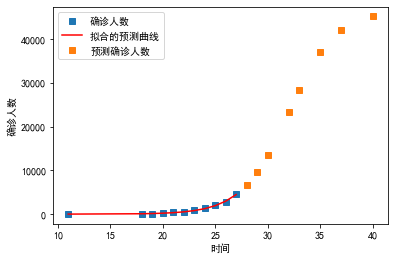

In [18]:
# 近期情况预测
tomorrow = [28, 29, 30, 32, 33, 35, 37, 40]
tomorrow = np.array(tomorrow)
tomorrow_predict = logistic_increase_function(
    tomorrow, popt1[0], popt1[1], popt1[2])

# 画出预测值和真实值的折线图
plot1 = plt.plot(t, P, 's', label="确诊人数")
plot2 = plt.plot(t, P_predict, 'r', label='拟合的预测曲线')
plot3 = plt.plot(tomorrow, tomorrow_predict, 's', label='预测确诊人数')
plt.xlabel('时间')
plt.ylabel('确诊人数')
plt.legend(loc=0)

接下来我们拓展这个模型，应用到各个国家，比较它们他们的2020年防疫措施的有效性。

#### 2.1.1 中国

In [19]:
# 输入参数
increase_rate = 0.25
country_name = '中国'
data_path = "../../data/covid_19/countrydata.csv"

K:capacity  P0:initial_value   r:increase_rate   t:time
[8.30820270e+04 6.48580425e+01 1.00000000e+00]
4314.162857031341
5458.983168484159


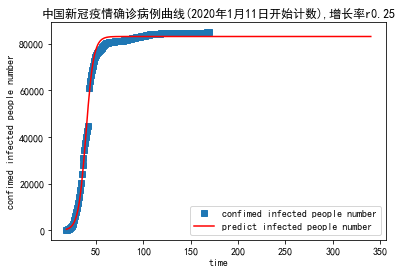

In [20]:
def logistic_function(t, K, P0, r):
    t0 = 11
    r = increase_rate
    exp_value = np.exp(r*(t-t0))
    return (K*exp_value*P0)/(K+(exp_value-1)*P0)


# 读取数据
data = pd.read_csv(data_path)

# 提取特定国家的数据
data = data[data['countryName'] == country_name]
date_list = list(data['dateId'])
date_list = list(map(lambda x: str(x), date_list))
confirm_list = list(data['confirmedCount'])
time_array = np.array(range(19, len(date_list)+19))
long_time_array = np.array(range(19, len(date_list)+190))
confirm_array = np.array(confirm_list)

# 现有数据曲线拟合预测
popt, pcov = curve_fit(logistic_function, time_array, confirm_array)

# 获取popt里面是拟合系数
print("K:capacity  P0:initial_value   r:increase_rate   t:time")
print(popt)

# 拟合后预测的P值
P_predict = logistic_function(long_time_array, popt[0], popt[1], popt[2])

# 绘图
plot1 = plt.plot(time_array, confirm_array, 's',
                 label="confimed infected people number")
plot2 = plt.plot(long_time_array, P_predict, 'r',
                 label='predict infected people number')
plt.xlabel('time')
plt.ylabel('confimed infected people number')
plt.title('{}新冠疫情确诊病例曲线(2020年1月11日开始计数),增长率r{}'.format(
    country_name, increase_rate))
plt.legend(loc=0)

print(logistic_function(np.array(28), popt[0], popt[1], popt[2]))
print(logistic_function(np.array(29), popt[0], popt[1], popt[2]))

#### 2.1.2 美国

In [21]:
# 输入参数
increase_rate = 0.04
country_name = '美国'
data_path = "../../data/covid_19/countrydata.csv"

K:capacity  P0:initial_value   r:increase_rate   t:time
[2.87406052e+06 2.01627977e+04 1.00000000e+00]
39528.82927818465
41118.95145157475


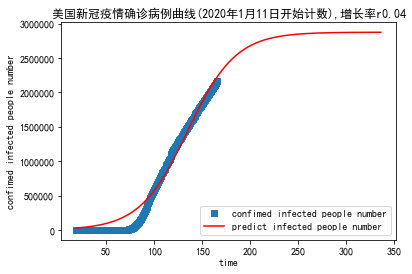

In [22]:
def logistic_function(t, K, P0, r):
    t0 = 11
    r = increase_rate
    exp_value = np.exp(r*(t-t0))
    return (K*exp_value*P0)/(K+(exp_value-1)*P0)


# 读取数据
data = pd.read_csv(data_path)

# 提取特定国家的数据
data = data[data['countryName'] == country_name]
date_list = list(data['dateId'])
date_list = list(map(lambda x: str(x), date_list))
confirm_list = list(data['confirmedCount'])
time_array = np.array(range(19, len(date_list)+19))
long_time_array = np.array(range(19, len(date_list)+190))
confirm_array = np.array(confirm_list)

# 现有数据曲线拟合预测
popt, pcov = curve_fit(logistic_function, time_array, confirm_array)

# 获取popt里面是拟合系数
print("K:capacity  P0:initial_value   r:increase_rate   t:time")
print(popt)

# 拟合后预测的P值
P_predict = logistic_function(long_time_array, popt[0], popt[1], popt[2])

# 绘图
plot1 = plt.plot(time_array, confirm_array, 's',
                 label="confimed infected people number")
plot2 = plt.plot(long_time_array, P_predict, 'r',
                 label='predict infected people number')
plt.xlabel('time')
plt.ylabel('confimed infected people number')
plt.title('{}新冠疫情确诊病例曲线(2020年1月11日开始计数),增长率r{}'.format(
    country_name, increase_rate))
plt.legend(loc=0)

print(logistic_function(np.array(28), popt[0], popt[1], popt[2]))
print(logistic_function(np.array(29), popt[0], popt[1], popt[2]))

#### 2.1.3 英国

In [23]:
# 输入参数
increase_rate = 0.07
country_name = '英国'
data_path = "../../data/covid_19/countrydata.csv"

K:capacity  P0:initial_value   r:increase_rate   t:time
[3.03512452e+05 4.20204782e+02 1.00000000e+00]
1376.8874622184414
1476.2374829974244


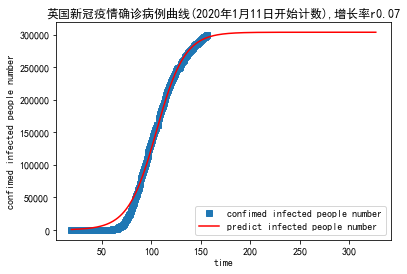

In [24]:
def logistic_function(t, K, P0, r):
    t0 = 11
    r = increase_rate
    exp_value = np.exp(r*(t-t0))
    return (K*exp_value*P0)/(K+(exp_value-1)*P0)


# 读取数据
data = pd.read_csv(data_path)

# 提取特定国家的数据
data = data[data['countryName'] == country_name]
date_list = list(data['dateId'])
date_list = list(map(lambda x: str(x), date_list))
confirm_list = list(data['confirmedCount'])
time_array = np.array(range(19, len(date_list)+19))
long_time_array = np.array(range(19, len(date_list)+190))
confirm_array = np.array(confirm_list)

# 现有数据曲线拟合预测
popt, pcov = curve_fit(logistic_function, time_array, confirm_array)

# 获取popt里面是拟合系数
print("K:capacity  P0:initial_value   r:increase_rate   t:time")
print(popt)

# 拟合后预测的P值
P_predict = logistic_function(long_time_array, popt[0], popt[1], popt[2])

# 绘图
plot1 = plt.plot(time_array, confirm_array, 's',
                 label="confimed infected people number")
plot2 = plt.plot(long_time_array, P_predict, 'r',
                 label='predict infected people number')
plt.xlabel('time')
plt.ylabel('confimed infected people number')
plt.title('{}新冠疫情确诊病例曲线(2020年1月11日开始计数),增长率r{}'.format(
    country_name, increase_rate))
plt.legend(loc=0)

print(logistic_function(np.array(28), popt[0], popt[1], popt[2]))
print(logistic_function(np.array(29), popt[0], popt[1], popt[2]))

关于R值的补充说明：逻辑斯蒂模型中R值代表的增长速率不是传统意义上理解的种群增长速度，而是接近种群数量达到环境承载力K值的速度。强烈的人为干预可以大幅度降低K值，使得种群数量快速达到最大值附近，疫情扩散得以控制。所以本模型在预测各国最终累计感染人数的功能之外，拟合过程中R值的大小可以反映某个国家面对新冠肺炎采取措施的有效性和效率。一般来说，R值越大，该国防疫措施越有效。

经过一些实验，一些国家的R值如下：


|国家|中国|美国|英国|德国|意大利|韩国|日本|
| :--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|R|0.25|0.04|0.07|0.09|0.08|0.11|0.08|

#### 2.1.4 上海疫情预测

数据从2022年3月22日开始到4月17日截至，预测了上海疫情确诊病例的增长曲线，经过实验发现r值在0.12比较符合目前的曲线，上海的确诊病例将会达到10w，这也从侧面证明了变异的奥密克戎病毒可怕的传染性。

最新数据从2022年3月22日开始到4月28日截至，预测了上海疫情确诊病例的增长曲线，经过实验发现r值在0.12比较符合目前的曲线，上海的确诊病例将会达到10w，这也从侧面证明了变异的奥密克戎病毒可怕的传染性。

[60915.18623676 61089.1492749  61233.76196248 61353.8689635
 61453.54904839 61536.22540817 61604.76361239 61661.55734409
 61708.6026038  61747.56137407 61779.81586458 61806.51447613
 61828.61057491 61846.8950838  61862.02379683 61874.54021651
 61884.89461077 61893.45988992 61900.54481702 61906.4049876
 61911.25194744 61915.26075853 61918.57627367 61921.31833745
 61923.58609561 61925.46156441 61927.01258628 61928.29527668
 61929.35604937 61930.23329248 61930.95875546 61931.55869653
 61932.05483207 61932.46512188 61932.8044189  61933.08500647
 61933.31704285 61933.50892877 61933.66761148 61933.79883621
 61933.90735412 61933.99709428 61934.07130593 61934.13267606
 61934.18342674 61934.22539554 61934.26010207 61934.28880298
 61934.31253748 61934.33216496]


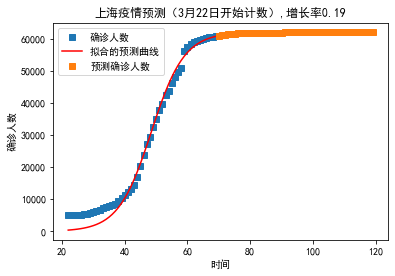

In [26]:
from scipy.optimize import curve_fit

increase_rate = 0.19


def logistic_increase_function(t, K, P0, r):
    '''
    t:time
    K:capacity
    P0:initial_value
    r:increase_rate

    t0:initial time
    '''
    t0 = 22
    r = increase_rate
    exp_value = np.exp(r*(t-t0))
    return (K*exp_value*P0)/(K+(exp_value-1)*P0)


# 日期
t = range(22, 70)
t = np.array(t)

# 感染人数
P = [5080, 5094, 5135, 5182, 5233, 5293, 5400, 5729, 6087, 6452, 6714, 7158,
     7591, 7862, 8177, 8506, 9334, 10351, 11366, 12283, 13281, 14471, 17044,
     20244, 23838, 27078, 29498,32582,35077,37712,39643,42379,43780,46252,
     47913,49519,50811,56300,57550,58339,59068,59342,59605,59868,60113,60366,
     60583,60907]
P = np.array(P)

# 用最小二乘法估计拟合
popt1, pcov1 = curve_fit(logistic_increase_function, t, P)

# 拟合后预测的值
P_predict = logistic_increase_function(t, popt1[0], popt1[1], popt1[2])

# 近期情况预测
tomorrow = range(70, 120)
tomorrow = np.array(tomorrow)
tomorrow_predict = logistic_increase_function(
    tomorrow, popt1[0], popt1[1], popt1[2])
print(tomorrow_predict)

# 画出预测值和真实值的折线图
plot1 = plt.plot(t, P, 's', label="确诊人数")
plot2 = plt.plot(t, P_predict, 'r', label='拟合的预测曲线')
plot3 = plt.plot(tomorrow, tomorrow_predict, 's', label='预测确诊人数')
plt.xlabel('时间')
plt.ylabel('确诊人数')
plt.title('上海疫情预测（3月22日开始计数）,增长率{}'.format(increase_rate))
plt.legend(loc=0)